# HW9

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from pprint import pprint

In [2]:
# Data load
url = 'https://f000.backblazeb2.com/file/jeldridge-data/013-regression/data.csv'
df = pd.read_csv(url, header=None)
df = df.rename(columns={0: 'x', 1: 'y'})

x = np.array(df['x'])
y = np.array(df['y'])

## Q1a

In [3]:
def calc_mse_w1(w1: float) -> float:
    """ Calculates the MSE given w1. Assumes w0 is 2.
    """
    w0 = 2
    y_pred = w0 + w1 * x
    mse = np.mean((y - y_pred) ** 2)
    return mse

print("MSE at w1 = 1:", calc_mse_w1(1))

MSE at w1 = 1: 139.60271462


## Q1b

In [4]:
def log_likelihood(w1):
    w0 = 2
    sigma = 4
    
    residuals = y - (w0 + w1 * x)
    log_likelihood_value = -0.5 * np.sum(np.log(2 * np.pi * sigma**2)\
                                         + (residuals / sigma)**2)
    return log_likelihood_value

print("Log likelihood at w1 = 1:", log_likelihood(1))

Log likelihood at w1 = 1: -333.3908863099782


## Q1c

In [5]:
w1_minimized = fmin(calc_mse_w1, 0)
print("w1 that minimizes MSE:", w1_minimized[0])

Optimization terminated successfully.
         Current function value: 14.069906
         Iterations: 28
         Function evaluations: 56
w1 that minimizes MSE: 3.0071875000000032


## Q1d

In [6]:
inverted_log_likelihood = lambda x: -log_likelihood(x)
w1_maximized = fmin(inverted_log_likelihood, 0)

print("w1 that maximizes log likelihood:", w1_maximized[0])

Optimization terminated successfully.
         Current function value: 137.245873
         Iterations: 28
         Function evaluations: 56
w1 that maximizes log likelihood: 3.0071875000000032


## Q1e

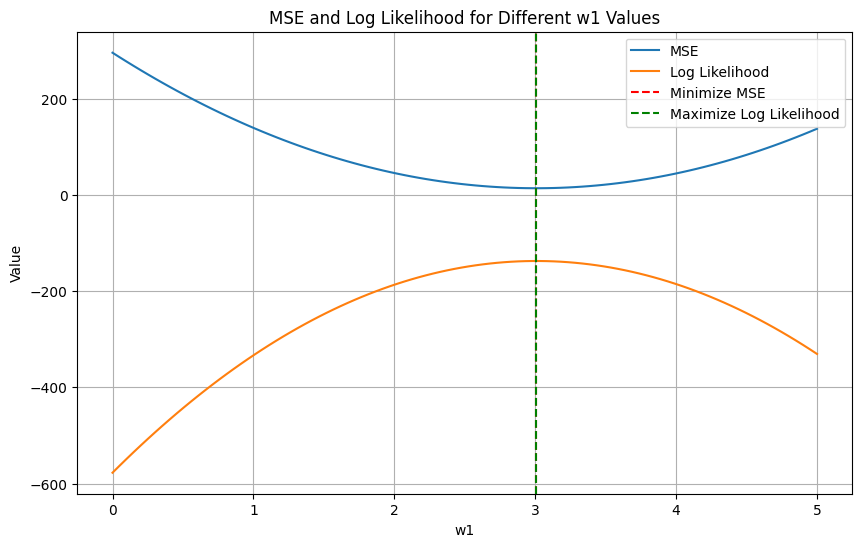

In [7]:
# Gen values
w1_values = np.linspace(0, 5, 100)

# Calc values to plot
mse_values = [calc_mse_w1(w1) for w1 in w1_values]
log_values = [log_likelihood(w1) for w1 in w1_values]

# Plot fig
plt.figure(figsize=(10, 6))
plt.plot(w1_values, mse_values, label='MSE')
plt.plot(w1_values, log_values, label='Log Likelihood')
plt.axvline(w1_minimized[0], color='r', linestyle='--', label='Minimize MSE')
plt.axvline(w1_maximized[0], color='g', linestyle='--', label='Maximize Log Likelihood')
plt.xlabel('w1')
plt.ylabel('Value')
plt.title('MSE and Log Likelihood for Different w1 Values')
plt.legend()
plt.grid(True)
plt.show()

## Q2

In [8]:
df = pd.DataFrame({
    'Temperature': [65, 72, 79, 55, 62, 71, 73],
    'Pressure': [1001, 1003, 1030, 1022, 1025, 1010, 1011],
    'Rain': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
})

def gini(labels):
    """ Calculates gini for uncertainty
    """
    classes = np.unique(labels)
    n_instances = len(labels)
    gini_coef = 0
    for class_val in classes:
        p = np.sum(labels == class_val) / n_instances
        gini_coef += p * (1 - p)
    return gini_coef

def split_uncertainty(df, feature, threshold):
    """ Calculates the uncertatntiy after each split
    """
    left_split = df[df[feature] < threshold]['Rain']
    right_split = df[df[feature] >= threshold]['Rain']
    n_instances = len(left_split) + len(right_split)
    uncertainty = (len(left_split) / n_instances) * gini(left_split) +\
                  (len(right_split) / n_instances) * gini(right_split)
    return uncertainty

def find_best_split(df, features):
    """ Finds the best split of the df
    """
    best_uncertainty = float('inf')
    best_feature = None
    best_threshold = None
    
    for feature in features:
        print(f'\n--- Calculating {feature} ---')
        values = df[feature].unique()
        for threshold in values:
            uncertainty = split_uncertainty(df, feature, threshold)
            print('Midpoint:', threshold, '    Gini Uncertainty:', uncertainty)
            if uncertainty < best_uncertainty:
                best_uncertainty = uncertainty
                best_feature = feature
                best_threshold = threshold
                
    return best_feature, best_threshold

def build_tree(df, depth, max_depth):
    """ Initializes the tree process recursively.
    """
    if depth == max_depth:
        return df['Rain'].mode()[0]
    print(f"\n\n\033[1m=== Calculating for Depth = {depth} ===\033[0m")
    
    best_feature, best_threshold = find_best_split(df, ['Temperature', 'Pressure'])
    left_split = df[df[best_feature] < best_threshold]
    right_split = df[df[best_feature] >= best_threshold]
    
    if len(left_split) == 0 or len(right_split) == 0:
        print(f'\n\033[4mMimnimum Reached. Designating as a leaf node.\033[0m')
        return df['Rain'].mode()[0]
    else:
        print(f'\n\033[4mBest Feature and Midpoint for Depth = {depth}:', best_feature, best_threshold, '\033[0m')
    
    tree = {}
    tree[(best_feature, best_threshold, '<')] = build_tree(left_split, depth + 1, max_depth)
    tree[(best_feature, best_threshold, '>=')] = build_tree(right_split, depth + 1, max_depth)
    
    return tree

# Build decision tree with depth 2
decision_tree = build_tree(df, 0, 2)



=== Calculating for Depth = 0 ===

--- Calculating Temperature ---
Midpoint: 65     Gini Uncertainty: 0.4857142857142857
Midpoint: 72     Gini Uncertainty: 0.40476190476190477
Midpoint: 79     Gini Uncertainty: 0.38095238095238093
Midpoint: 55     Gini Uncertainty: 0.4897959183673469
Midpoint: 62     Gini Uncertainty: 0.42857142857142855
Midpoint: 71     Gini Uncertainty: 0.47619047619047616
Midpoint: 73     Gini Uncertainty: 0.2285714285714286

--- Calculating Pressure ---
Midpoint: 1001     Gini Uncertainty: 0.4897959183673469
Midpoint: 1003     Gini Uncertainty: 0.42857142857142855
Midpoint: 1030     Gini Uncertainty: 0.38095238095238093
Midpoint: 1022     Gini Uncertainty: 0.40476190476190477
Midpoint: 1025     Gini Uncertainty: 0.2285714285714286
Midpoint: 1010     Gini Uncertainty: 0.34285714285714286
Midpoint: 1011     Gini Uncertainty: 0.21428571428571427

Best Feature and Midpoint for Depth = 0: Pressure 1011 


=== Calculating for Depth = 1 ===

--- Calculating Temperature 

In [9]:
# Print Tree Nicely
pprint(decision_tree)

{('Pressure', 1011, '<'): 'Yes',
 ('Pressure', 1011, '>='): {('Temperature', 62, '<'): 'Yes',
                            ('Temperature', 62, '>='): 'No'}}


Hand drawn version, made with love:
![hand drawn version of decision tree](./image.png)